In [65]:
import pandas as pd 
import numpy as np
import io as io 
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from efficient_apriori import apriori
from sklearn.cluster import KMeans  

In [24]:
##获取文件
def function_ReadFile(parm_FilePath):
    """
    @author:***
    @parameter: {FilePath:文件目录}
    @create_date:
    @update_date:
    @comment:获取文件
    """
    DataFrame_File = pd.read_excel(parm_FilePath)
    return DataFrame_File

In [147]:
# 获取画图方法
def  function_Plot(parm_DataFrame,parm_FilePath):
    """
    @author:***
    @parameter: {parm_DataFrame:数据框}
    @create_date:
    @update_date:
    @comment:获取图形
    """
    # 指定默认字体
    mpl.rcParams['font.sans-serif'] = ['STZhongsong'] 
    # 解决保存图像是负号'-'显示为方块的问题
    mpl.rcParams['axes.unicode_minus'] = False  
    # 创建图
    plt.figure()
    str_title = (parm_FilePath.split('/')[-1].split('.')[0])
    plt.title(str_title)
    plt.bar(range(len(parm_DataFrame)),parm_DataFrame.iloc[:,1],align = 'center')
    plt.xticks(range(len(parm_DataFrame)),parm_DataFrame.iloc[:,0],rotation=90)
    # 添加数据标签
    for a, b in zip(range(len(parm_DataFrame.iloc[:0])), parm_DataFrame.iloc[:1]):
        plt.text(a, b + 0.05 , '%.3f' % b,ha='center', va='bottom',fontsize=10)

    savefig(parm_FilePath)
    return None

In [7]:
#获取随机森林方法
def  function_Importances(parm_DataFrame):
    """
    @author:***
    @parameter: {parm_DataFrame:数据框}
    @create_date:
    @update_date:
    @commet:通过随机森林获取重要性和模型
    """
    #
    RSR_result = RandomForestRegressor().fit(parm_DataFrame.iloc[:,1:-1] \
                                            ,parm_DataFrame.iloc[:,-1])
    RSR_importances = RSR_result.feature_importances_
    feature_name = list(parm_DataFrame.columns)[1:-1]
    DataFrame_Result = pd.DataFrame({'feature_name':feature_name, 'value':list(RSR_importances)})
    DataFrame_Result = DataFrame_Result.sort_values(by='value', ascending=False)
    return [DataFrame_Result,RSR_result]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backen

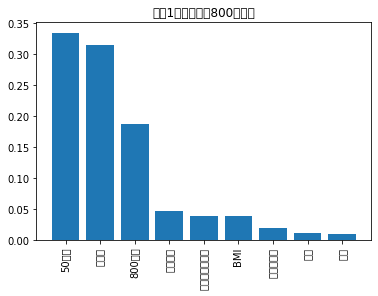

In [149]:
if __name__=="__main__":
    #女结果图
    DataFrame_TestF = function_ReadFile('/Users/zhoujianjun/Downloads/workplace/2020-05-21/data/附件1：第一年（800名女）.xlsx')
    list_Importances_TestF = function_Importances(DataFrame_TestF)
    function_Plot(list_Importances_TestF[0], '/Users/zhoujianjun/Downloads/workplace/2020-05-21/image/附件1：第一年（800名女）.jpg')

In [28]:
    #女训练集合
    DataFrame_TrainF = function_ReadFile('/Users/zhoujianjun/Downloads/workplace/2020-05-21/data/附件3：第二年（800名女）.xlsx')
    #女训练级预测结果
    print(list(list_Importances_TestF[1].predict(DataFrame_TrainF.iloc[:, 1:-1])))

[61.19000000000001, 79.46000000000001, 71.47, 62.089999999999996, 70.04, 62.370000000000005, 84.11, 80.62, 66.02000000000001, 70.84, 63.65999999999999, 70.99999999999999, 76.52000000000001, 79.74, 79.74000000000001, 81.52, 69.01, 71.02000000000001, 66.27, 71.26, 70.05, 77.81, 75.59, 79.24, 67.98, 64.48000000000002, 70.6, 66.14000000000001, 75.82000000000001, 63.839999999999996, 65.0, 67.69999999999999, 76.79999999999998, 74.82000000000001, 66.98000000000002, 73.10999999999999, 72.52, 75.60999999999999, 71.22, 75.58, 71.94, 75.99, 80.22, 71.63999999999999, 57.45, 83.06000000000002, 71.89000000000001, 74.64, 76.73, 78.35, 69.31, 63.82000000000001, 62.36, 80.25999999999999, 63.29999999999999, 63.370000000000005, 64.25999999999999, 75.27000000000001, 74.03999999999999, 68.99, 85.36, 68.89000000000001, 74.71000000000001, 64.57000000000001, 74.68, 72.91, 69.86000000000001, 79.01000000000002, 73.14000000000001, 63.079999999999984, 75.72999999999999, 75.69000000000001, 71.93, 59.71, 73.4399999

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backen

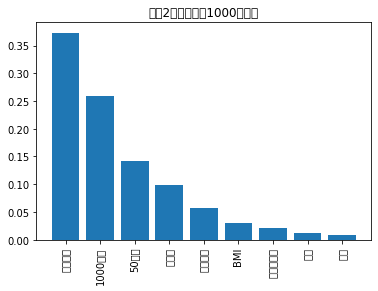

In [148]:
    #男结果图
    DataFrame_TestM = function_ReadFile('/Users/zhoujianjun/Downloads/workplace/2020-05-21/data/附件2：第一年（1000名男）.xlsx')
    list_Importances_TestM = function_Importances(DataFrame_TestM)
    function_Plot(list_Importances_TestM[0], '/Users/zhoujianjun/Downloads/workplace/2020-05-21/image/附件2：第一年（1000名男）.jpg')

In [31]:
    # 男训练集合
    DataFrame_TrainM = function_ReadFile('/Users/zhoujianjun/Downloads/workplace/2020-05-21/data/附件4：第二年（1000名男）.xlsx')
    # 男训练级预测结果
    print(list(list_Importances_TestM[1].predict(DataFrame_TrainM.iloc[:, 1:-1])))

[67.92999999999999, 75.81, 77.24000000000001, 57.75999999999999, 81.76, 67.24, 65.49999999999999, 52.58, 70.35000000000001, 72.60999999999999, 59.31, 59.220000000000006, 72.21, 68.47999999999999, 67.29, 64.92999999999999, 55.07000000000001, 65.46000000000001, 60.31, 71.17000000000002, 74.01, 71.11999999999999, 52.33, 60.88000000000001, 64.71, 80.88000000000002, 64.26, 43.82000000000001, 55.629999999999995, 72.38, 73.54, 51.9, 54.749999999999986, 60.5, 70.18, 76.38, 85.42, 68.91, 63.2, 53.48, 63.31999999999999, 72.00000000000001, 54.029999999999994, 68.31000000000002, 69.11000000000001, 58.71, 63.44, 75.55, 72.44, 71.70000000000002, 68.98000000000002, 67.59, 74.21000000000001, 59.64999999999999, 52.58, 66.55, 61.339999999999996, 61.230000000000004, 67.20000000000002, 70.66, 65.86999999999999, 61.64999999999999, 66.15, 75.2, 58.879999999999995, 63.95, 65.19999999999999, 72.22, 54.870000000000005, 72.42999999999999, 71.75000000000001, 65.82000000000001, 64.75999999999999, 65.78, 70.479999

In [63]:
    #定义关联规则函数
    def function_rules(parm_DataFrame,parm_confidence=0.85):
        """
        @author:***
        @parameter: {parm_DataFrame:数据框,parm_confidence:最新致信读默认为0.85}
        @create_date:
        @update_date:
        @comment:获取关联规则
        """
        itemsets_female, rules = apriori(parm_DataFrame.values.tolist()
                                        ,min_support=0.5
                                        ,min_confidence=parm_confidence)
        return rules_female

In [62]:
    #获取女性数据关联规则
    dataframe_rule_female = pd.read_csv('/Users/zhoujianjun/Downloads/workplace/2020-05-21/data/female.csv',encoding = 'gbk').iloc[:,1:]
    print(function_rules(dataframe_rule_female))

[{800米及格} -> {仰卧起坐及格}, {50米及格} -> {仰卧起坐及格}, {肺活量及格} -> {仰卧起坐及格}, {立定跳远及格} -> {仰卧起坐及格}, {50米及格, 800米及格} -> {仰卧起坐及格}, {50米及格, 正常} -> {仰卧起坐及格}, {50米及格, 肺活量及格} -> {仰卧起坐及格}, {800米及格, 正常} -> {仰卧起坐及格}, {800米及格, 肺活量及格} -> {仰卧起坐及格}, {正常, 肺活量及格} -> {仰卧起坐及格}, {50米及格, 立定跳远及格} -> {800米及格}, {仰卧起坐及格, 立定跳远及格} -> {800米及格}, {800米及格, 立定跳远及格} -> {仰卧起坐及格}, {立定跳远及格, 肺活量及格} -> {仰卧起坐及格}, {50米及格, 立定跳远及格} -> {仰卧起坐及格}]


In [64]:
    #获取男性数据关联规则
    dataframe_rule_male = pd.read_csv('/Users/zhoujianjun/Downloads/workplace/2020-05-21/data/male.csv',encoding = 'gbk').iloc[:,1:]
    print(function_rules(dataframe_rule_male))

[{800米及格} -> {仰卧起坐及格}, {50米及格} -> {仰卧起坐及格}, {肺活量及格} -> {仰卧起坐及格}, {立定跳远及格} -> {仰卧起坐及格}, {50米及格, 800米及格} -> {仰卧起坐及格}, {50米及格, 正常} -> {仰卧起坐及格}, {50米及格, 肺活量及格} -> {仰卧起坐及格}, {800米及格, 正常} -> {仰卧起坐及格}, {800米及格, 肺活量及格} -> {仰卧起坐及格}, {正常, 肺活量及格} -> {仰卧起坐及格}, {50米及格, 立定跳远及格} -> {800米及格}, {仰卧起坐及格, 立定跳远及格} -> {800米及格}, {800米及格, 立定跳远及格} -> {仰卧起坐及格}, {立定跳远及格, 肺活量及格} -> {仰卧起坐及格}, {50米及格, 立定跳远及格} -> {仰卧起坐及格}]


In [145]:
    #获取女性第一年kmeans 
    kmeans_test_F = KMeans(n_clusters=3) 
    kmeans_test_F.fit(DataFrame_TestF.iloc[:,1:-1]) 
    print(kmeans_test_F)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [87]:
    #获取男性第一年kmeans
    kmeans_test_M = KMeans() 
    kmeans_test_M.fit(DataFrame_TestM.iloc[:,1:-1]) 
    print(kmeans_test_M)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
